# Neural networks

Dark magic incoming...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, PReLU, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
happy = pd.read_csv("./data/happiness.csv", usecols=[1,2,3])

#dependent variable
y = happy['happy']

# explaining variables
X = happy[['temp', 'fish']]

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### I will use keras, with tensorflow as back-end

But if you want to have fine control of the algorithm, you can use tensorflow directly

I will only present feedforward neural network, but there are also a large amount of different networks (Recurrent Neural Networks to work on time series, Generative Adversarial Networks to reverse the process and generate values of variaibles of interests based on outputs, etc.)

In this situation, using a NN is overkill!

In [3]:
model = Sequential()
model.add(Dense(2, input_dim=2))
# These 2 nodes are linked to the 10 nodes of the following layer
# The next nodes will receive a weighted sum of these 2 values as input
model.add(Dense(10, activation='relu'))
# we add an activation function to compose the result (i.e. the weighted sum) by reLU
# rectified Linear Unit = identity for positive and 0 for negative values
model.add(Dense(5, activation='relu'))
# Finally, we aggregate the 5 last values in one layer of one value, our prediction :)
model.add(Dense(1))

model.compile(loss='MSE', optimizer='SGD')
#Stochastic Gradient Descent
model.fit(X_train, y_train, epochs=10)
# One epoch = one loop over the training dataset

Epoch 1/10
9/9 [==============================] - 0s 567us/step - loss: 3.3339
Epoch 2/10
9/9 [==============================] - 0s 536us/step - loss: 1.1908
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.8672
Epoch 4/10
9/9 [==============================] - 0s 520us/step - loss: 0.8080
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.7822
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.8304
Epoch 7/10
9/9 [==============================] - 0s 857us/step - loss: 0.7607
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 0.7412
Epoch 9/10
9/9 [==============================] - 0s 962us/step - loss: 0.7632
Epoch 10/10
9/9 [==============================] - 0s 819us/step - loss: 0.7219


In [4]:
y_pred = np.array([model.predict(X_test)[i][0] for i in range(len(X_test))])
y_pred

array([4.2222357 , 3.2110243 , 3.2105415 , 2.7494464 , 3.134014  ,
       0.84362006, 1.1581205 , 2.6800106 , 3.0910943 , 0.7399223 ,
       1.2404647 , 1.7862543 , 1.5905445 , 3.1115856 , 3.6039248 ,
       1.4238465 , 4.502869  , 3.1544304 , 1.0523497 , 4.2650366 ,
       1.927565  , 3.8247144 , 0.79042214, 3.4309347 , 2.2859814 ,
       0.96122193, 1.1360835 , 1.1116972 , 2.171878  , 2.491334  ,
       0.6157195 , 3.013913  , 3.2950838 , 4.165277  , 0.84049124,
       1.3573395 , 3.785755  , 2.6926885 , 3.5723486 , 3.155176  ,
       2.7181852 , 3.3496394 , 4.9463005 , 4.0924253 , 3.4088595 ,
       3.141432  , 2.0536947 , 1.3189819 , 1.1552913 , 3.6486766 ,
       0.8746411 , 0.70175827, 0.8598284 , 1.2948403 , 4.525438  ,
       2.5478098 , 3.4293869 , 3.476091  , 2.153441  , 1.0047592 ,
       0.92553824, 2.41125   , 1.8435903 , 0.5813029 , 4.090463  ,
       3.1928294 , 3.6364968 , 3.9610436 , 1.5049149 , 3.0781617 ,
       1.3694395 , 1.695254  , 1.2872726 , 1.8172523 , 3.48670

Mean Squared Error : 0.6405824107498075


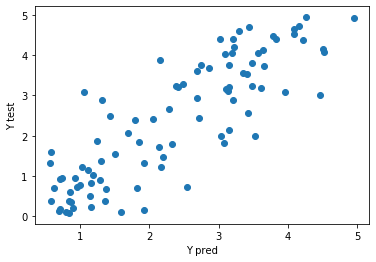

In [5]:
print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

My opinion :

- If you don't know why you're using NN to solve a problem,
- If you don't have at least few thousands of lines in your dataset,
- If you want some feedback about your predictions, others than just the accuracy of your model,
- <b>If you work on sensible topics, e.g. healthcare</b>,

it's a good reason to stop it right now (sorry for being annoying :p)

There are a lot of good algorithms out there that will do the job!

If you just want to test it, have fun :)